In [99]:
#Neural Network kullanarak ev fiyatlarını tahmin eden bir derin öğrenme algoritma geliştirelim.
#Kütüphaneleri import edelim.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [100]:
#Datamızı dataframe olarak import edelim
df = pd.read_csv('kc_house_data.csv')

In [101]:
#Datamıza bakalım
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [102]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [104]:
#Null veri var mı ?
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [105]:
#Date kolonunu kullanabileceğimiz bir veri tipine çevirelim ve month ve year diye ayıralım.
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date : date.month)
df['year'] = df['date'].apply(lambda date : date.year)
#Artık date kolonunu datadan çıkarabiliriz.
df.drop('date', axis=1, inplace=True)

In [106]:
#Yeni dataframe'e bakalım
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [107]:
#id ile zipcode alanları bizim için algoritmamızda değersiz o yüzden onları çıkaralım.
df.drop(['id','zipcode'],axis=1,inplace=True)

<AxesSubplot:xlabel='month'>

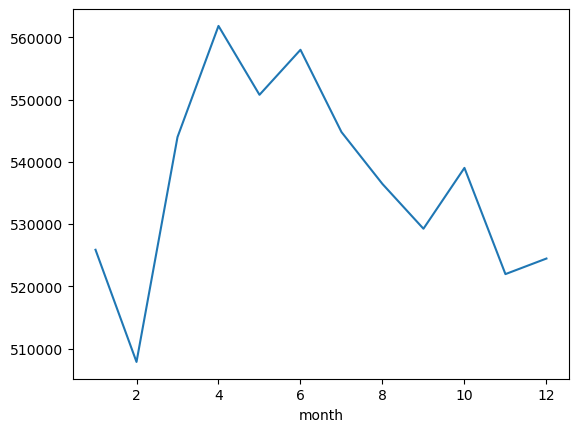

In [108]:
#Aylara göre price değerinin değişimi
df.groupby('month').mean()['price'].plot()

In [109]:
#Şimdi verilerimizi sinir ağına sokmak için hazırlayalım.
X = df.drop('price',axis=1)
y = df['price']
#Train ve test diye ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [110]:
#Verilerimizin shape'lerine bakalım.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14480, 19), (7133, 19), (14480,), (7133,))

In [111]:
#Verilerimizi algoritmaya sokmadan önce normalize edelim.
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
ct = make_column_transformer(
    (MinMaxScaler(),[column for column in list(X_train.columns.values)])
)
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [112]:
#Değerlerimizi 0 ile 1 arasına çekmiş olduk
X_train_normal.max(), X_train_normal.min()

(1.0, 0.0)

In [119]:
#Modelimizi oluşturalım
model = tf.keras.Sequential([
    tf.keras.layers.Dense(19, activation='ReLU'),
    tf.keras.layers.Dense(19, activation='ReLU'),
    tf.keras.layers.Dense(19, activation='ReLU'),
    tf.keras.layers.Dense(19, activation='ReLU'),
    tf.keras.layers.Dense(1)
])
model.compile(loss='mae',
             optimizer='adam')

In [120]:
#Verilerimizle modeli eğitelim
model.fit(X_train_normal, y_train, epochs=500, batch_size=128, verbose=0)

In [121]:
#Test datasında modelimizle tahmin yapalım
y_preds = model.predict(X_test_normal)

223/223 [==============================] - 0s 1ms/step


In [122]:
#Modelimizi değerlendirelim.
print('Modelin değerlendirilmesi')
print('\n')
print("MAE :", tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds)).numpy()) 
print("MSE :", tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_preds)).numpy())
print("RMSE :", np.sqrt(tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_preds))))
#Tahmin edilen kolonun istatistiksel değerleri
print('\n')
print('Price kolonunun istatistiksel değerleri')
print('\n')
print(df['price'].describe())

Modelin değerlendirilmesi


MAE : 105376.47
MSE : 34471930000.0
RMSE : 185666.19


Price kolonunun istatistiksel değerleri


count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


In [123]:
100*model.evaluate(X_test_normal,y_test)/y_train.mean()

223/223 [==============================] - 0s 1ms/step - loss: 105376.4531


19.594384445720134

In [124]:
#%81 tahmin oranımız var. Bu çokta iyi bir sonuç değil. Bunun temel sebebi tahmin edilen kolondaki uç değerlerin fazla olmasıdır.